In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac258168055ed1bdeb1780d03e8ed465


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "austin"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [10]:
cities

['esperance',
 'kavaratti',
 'hamilton',
 'coquimbo',
 'albany',
 'busselton',
 'jamestown',
 'barrow',
 'yulara',
 'taolanaro',
 'saskylakh',
 'waipawa',
 'sterling',
 'punta arenas',
 'avarua',
 'mys shmidta',
 'alofi',
 'barentsburg',
 'moramanga',
 'belushya guba',
 'rikitea',
 'murakami',
 'port alfred',
 'bousso',
 'severo-kurilsk',
 'darnah',
 'attawapiskat',
 'bethel',
 'port elizabeth',
 'tura',
 'vila velha',
 'kapaa',
 'castro',
 'garowe',
 'lebu',
 'wanaka',
 'atar',
 'labuhan',
 'thinadhoo',
 'ankeny',
 'tromso',
 'saleaula',
 'beloha',
 'mossoro',
 'padang',
 'saint-philippe',
 'taoudenni',
 'cabo san lucas',
 'tucurui',
 'bozeman',
 'sept-iles',
 'igra',
 'marcona',
 'bandarbeyla',
 'mahebourg',
 'hermanus',
 'keetmanshoop',
 'acapulco',
 'hobart',
 'provideniya',
 'lompoc',
 'stornoway',
 'dzhusaly',
 'bilibino',
 'sao filipe',
 'butaritari',
 'saint george',
 'dubbo',
 'kodiak',
 'yatou',
 'mazamet',
 'tuktoyaktuk',
 'tokur',
 'sola',
 'sidmouth',
 'melnikovo',
 'carna

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters 
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.   
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | waipawa
Processing Record 13 of Set 1 | sterling
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | moramanga
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Process

Processing Record 39 of Set 4 | miraflores
Processing Record 40 of Set 4 | olavarria
Processing Record 41 of Set 4 | ekibastuz
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | lamu
Processing Record 44 of Set 4 | sindi
Processing Record 45 of Set 4 | ostersund
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | isangel
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | saint-georges
Processing Record 50 of Set 4 | the valley
Processing Record 1 of Set 5 | escuinapa
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | vilela
Processing Record 8 of Set 5 | kilmez
City not found. Skipping...
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | inhambane
Processing Record 11 of Set 5 | balabac
Processing Record 12 of 

Processing Record 28 of Set 8 | katsuura
Processing Record 29 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 30 of Set 8 | hirado
Processing Record 31 of Set 8 | kaitangata
Processing Record 32 of Set 8 | koboldo
City not found. Skipping...
Processing Record 33 of Set 8 | bundoran
Processing Record 34 of Set 8 | hokitika
Processing Record 35 of Set 8 | barkly west
Processing Record 36 of Set 8 | antsirabe
Processing Record 37 of Set 8 | bhattiprolu
Processing Record 38 of Set 8 | obzor
Processing Record 39 of Set 8 | nyagan
Processing Record 40 of Set 8 | komatipoort
Processing Record 41 of Set 8 | san policarpo
Processing Record 42 of Set 8 | norman wells
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | boa vista
Processing Record 45 of Set 8 | srednekolymsk
Processing Record 46 of Set 8 | phan thiet
Processing Record 47 of Set 8 | chumikan
Processing Record 48 of Set 8 | ushtobe
Processing Record 49 of Set 8 | jackson
Processing Record 50 of 

Processing Record 13 of Set 12 | zonguldak
Processing Record 14 of Set 12 | kamenka
Processing Record 15 of Set 12 | morehead
Processing Record 16 of Set 12 | palana
Processing Record 17 of Set 12 | pangkalanbuun
Processing Record 18 of Set 12 | zhanaozen
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | kenai
Processing Record 21 of Set 12 | chlorakas
Processing Record 22 of Set 12 | khandyga
Processing Record 23 of Set 12 | santa elena
Processing Record 24 of Set 12 | zdunska wola
Processing Record 25 of Set 12 | pachperwa
Processing Record 26 of Set 12 | mansa
Processing Record 27 of Set 12 | hualmay
Processing Record 28 of Set 12 | samandag
Processing Record 29 of Set 12 | mnogovershinnyy
Processing Record 30 of Set 12 | anzio
Processing Record 31 of Set 12 | visnes
Processing Record 32 of Set 12 | ilulissat
Processing Record 33 of Set 12 | ukiah
Processing Record 34 of Set 12 | kozhva
Processing Record 35 of Set 12 | kyra
Processing Record 36 of Set 12 | fl

In [12]:
len(city_data)

558

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,66.04,83,100,17.58,AU,2022-03-27 01:46:43
1,Kavaratti,10.5669,72.6420,82.27,70,11,2.93,IN,2022-03-27 01:46:43
2,Hamilton,39.1834,-84.5333,33.75,65,40,16.11,US,2022-03-27 01:46:44
3,Coquimbo,-29.9533,-71.3436,62.26,83,4,2.21,CL,2022-03-27 01:45:33
4,Albany,42.6001,-73.9662,39.25,91,90,5.64,US,2022-03-27 01:42:29
5,Busselton,-33.6500,115.3333,68.52,60,46,20.54,AU,2022-03-27 01:46:44
6,Jamestown,42.0970,-79.2353,31.59,71,100,12.66,US,2022-03-27 01:45:42
7,Barrow,71.2906,-156.7887,1.42,78,20,19.57,US,2022-03-27 01:42:28
8,Yulara,-25.2406,130.9889,82.24,17,3,11.50,AU,2022-03-27 01:46:45
9,Saskylakh,71.9167,114.0833,-15.99,100,100,4.14,RU,2022-03-27 01:46:45


In [14]:
city_data_df = city_data_df[["City", "Country", "Date" ,"Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-03-27 01:46:43,-33.8667,121.9000,66.04,83,100,17.58
1,Kavaratti,IN,2022-03-27 01:46:43,10.5669,72.6420,82.27,70,11,2.93
2,Hamilton,US,2022-03-27 01:46:44,39.1834,-84.5333,33.75,65,40,16.11
3,Coquimbo,CL,2022-03-27 01:45:33,-29.9533,-71.3436,62.26,83,4,2.21
4,Albany,US,2022-03-27 01:42:29,42.6001,-73.9662,39.25,91,90,5.64
...,...,...,...,...,...,...,...,...,...
553,Goya,AR,2022-03-27 02:02:15,-29.1400,-59.2626,61.57,77,0,1.66
554,Ust-Kuyga,RU,2022-03-27 02:02:15,70.0167,135.6000,2.17,94,97,6.73
555,Asosa,ET,2022-03-27 02:02:15,10.0667,34.5333,66.61,31,76,5.88
556,Zaragoza,ES,2022-03-27 02:02:16,41.6561,-0.8773,51.03,84,100,2.30


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

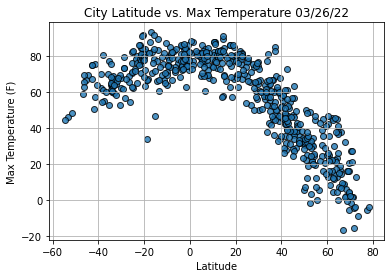

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

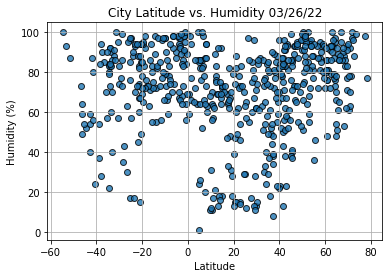

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

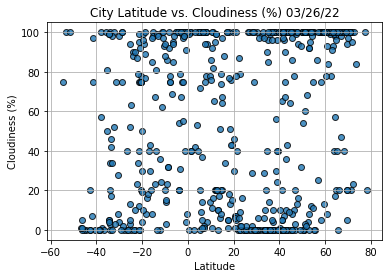

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

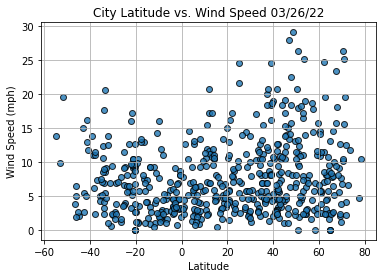

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [21]:
## Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kavaratti,IN,2022-03-27 01:46:43,10.5669,72.6420,82.27,70,11,2.93
2,Hamilton,US,2022-03-27 01:46:44,39.1834,-84.5333,33.75,65,40,16.11
4,Albany,US,2022-03-27 01:42:29,42.6001,-73.9662,39.25,91,90,5.64
6,Jamestown,US,2022-03-27 01:45:42,42.0970,-79.2353,31.59,71,100,12.66
7,Barrow,US,2022-03-27 01:42:28,71.2906,-156.7887,1.42,78,20,19.57


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

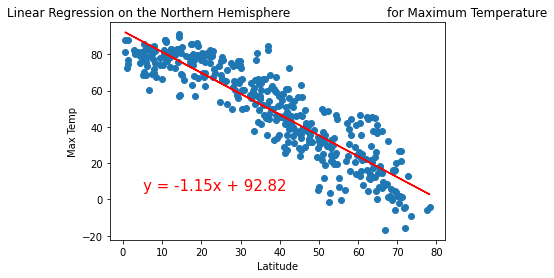

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,5))

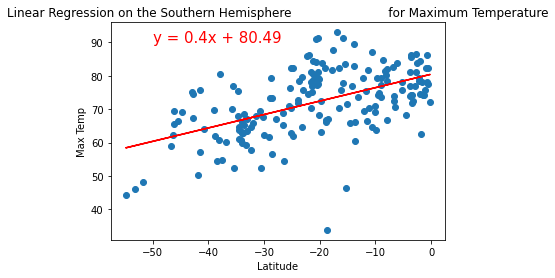

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

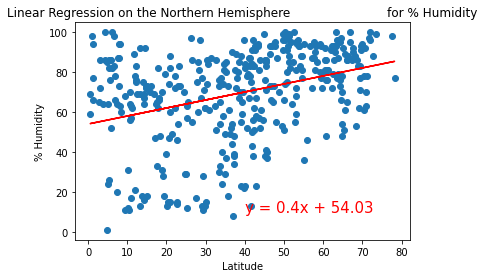

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

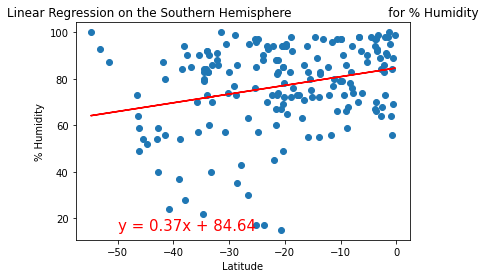

In [27]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

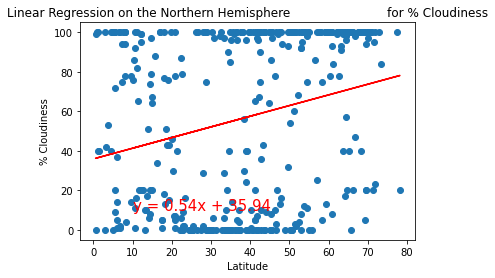

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,10))

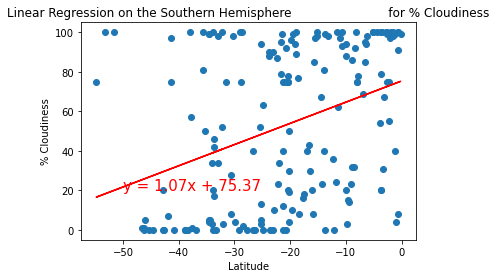

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

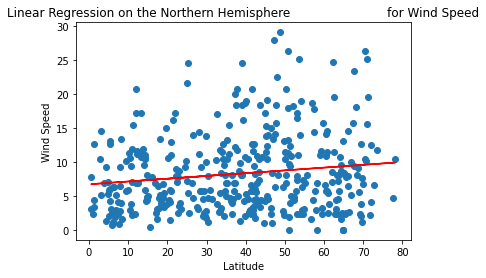

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

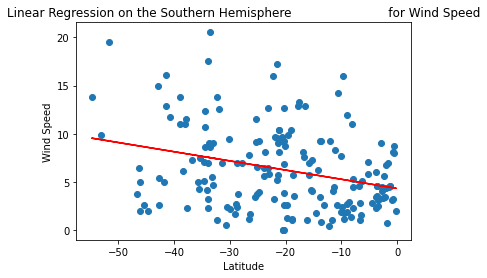

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))